In [45]:
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text



# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 

# Transform job_skills from str to list by using apply method
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [46]:
df_DA_UKR = df[(df['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer'])) & (df['job_country'] == 'Ukraine')].copy()

df_DA_UKR['job_posted_month_no'] = df_DA_UKR['job_posted_date'].dt.month # added new calumn job_posted_month_no

df_DA_UKR['job_title_short'].value_counts()

job_title_short
Data Analyst      473
Data Engineer     374
Data Scientist    232
Name: count, dtype: int64

In [47]:
df_DA_explode = df_DA_UKR.explode('job_skills')

In [48]:
df_DA_Ukr_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_Ukr_pivot.loc['total'] = df_DA_Ukr_pivot.sum()

df_DA_Ukr_pivot = df_DA_Ukr_pivot[df_DA_Ukr_pivot.loc['total'].sort_values(ascending=False).index]

df_DA_Ukr_pivot = df_DA_Ukr_pivot.drop('total')


df_DA_Ukr_pivot



job_skills,sql,python,aws,tableau,power bi,spark,excel,azure,airflow,gcp,...,codecommit,alteryx,asana,terminal,phoenix,php,symphony,ruby on rails,solidity,powershell
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,72,71,27,14,13,29,12,18,20,11,...,0,0,0,0,0,0,0,0,0,0
2,54,50,22,18,11,11,11,9,10,10,...,0,0,0,1,0,0,0,0,0,0
3,49,42,13,12,12,12,18,16,7,5,...,0,0,0,0,0,0,0,0,0,1
4,30,23,11,11,8,7,7,6,8,6,...,0,0,0,0,0,0,0,0,0,0
5,47,43,19,18,19,8,12,10,11,10,...,0,0,0,0,1,0,0,0,0,0
6,56,45,15,22,21,10,11,13,8,5,...,0,0,0,0,0,0,1,0,0,0
7,39,35,19,16,14,11,11,14,10,9,...,1,0,0,0,0,0,0,0,0,0
8,34,27,14,9,7,13,6,10,8,9,...,0,0,0,0,0,0,0,0,0,0
9,40,45,24,9,12,15,8,11,10,10,...,0,0,0,0,0,0,0,0,0,0


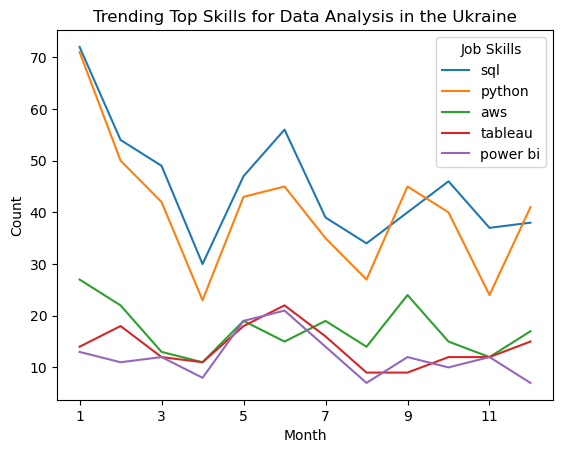

In [49]:
df_DA_Ukr_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysis in the Ukraine')
plt.ylabel('Count')
plt.xlabel('Month')
plt.legend().set_title('Job Skills')
plt.show()

In [50]:
df_total = df_DA_UKR.groupby('job_posted_month_no').size()

df_total

job_posted_month_no
1     150
2     108
3      90
4      62
5      85
6     103
7      67
8      82
9      80
10     87
11     75
12     90
dtype: int64

In [51]:
# Need to divide the appropriate raws by the total to get percentage, will use pandas.div 

df_DA_Ukr_perc = df_DA_Ukr_pivot.div(df_total/100, axis=0)

df_DA_Ukr_perc

job_skills,sql,python,aws,tableau,power bi,spark,excel,azure,airflow,gcp,...,codecommit,alteryx,asana,terminal,phoenix,php,symphony,ruby on rails,solidity,powershell
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48.000000,47.333333,18.000000,9.333333,8.666667,19.333333,8.000000,12.000000,13.333333,7.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,50.000000,46.296296,20.370370,16.666667,10.185185,10.185185,10.185185,8.333333,9.259259,9.259259,...,0.000000,0.000000,0.000000,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,54.444444,46.666667,14.444444,13.333333,13.333333,13.333333,20.000000,17.777778,7.777778,5.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.111111
4,48.387097,37.096774,17.741935,17.741935,12.903226,11.290323,11.290323,9.677419,12.903226,9.677419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.294118,50.588235,22.352941,21.176471,22.352941,9.411765,14.117647,11.764706,12.941176,11.764706,...,0.000000,0.000000,0.000000,0.000000,1.176471,0.000000,0.000000,0.000000,0.000000,0.000000
6,54.368932,43.689320,14.563107,21.359223,20.388350,9.708738,10.679612,12.621359,7.766990,4.854369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970874,0.000000,0.000000,0.000000
7,58.208955,52.238806,28.358209,23.880597,20.895522,16.417910,16.417910,20.895522,14.925373,13.432836,...,1.492537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,41.463415,32.926829,17.073171,10.975610,8.536585,15.853659,7.317073,12.195122,9.756098,10.975610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,50.000000,56.250000,30.000000,11.250000,15.000000,18.750000,10.000000,13.750000,12.500000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
# Changing month num to month name 

df_DA_Ukr_perc = df_DA_Ukr_perc.reset_index()
df_DA_Ukr_perc['job_posted_month'] = df_DA_Ukr_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Ukr_perc = df_DA_Ukr_perc.set_index('job_posted_month')
df_DA_Ukr_perc = df_DA_Ukr_perc.drop(columns='job_posted_month_no')



In [53]:
df_DA_Ukr_perc

job_skills,sql,python,aws,tableau,power bi,spark,excel,azure,airflow,gcp,...,codecommit,alteryx,asana,terminal,phoenix,php,symphony,ruby on rails,solidity,powershell
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.000000,47.333333,18.000000,9.333333,8.666667,19.333333,8.000000,12.000000,13.333333,7.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,50.000000,46.296296,20.370370,16.666667,10.185185,10.185185,10.185185,8.333333,9.259259,9.259259,...,0.000000,0.000000,0.000000,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.444444,46.666667,14.444444,13.333333,13.333333,13.333333,20.000000,17.777778,7.777778,5.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.111111
Apr,48.387097,37.096774,17.741935,17.741935,12.903226,11.290323,11.290323,9.677419,12.903226,9.677419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.294118,50.588235,22.352941,21.176471,22.352941,9.411765,14.117647,11.764706,12.941176,11.764706,...,0.000000,0.000000,0.000000,0.000000,1.176471,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,54.368932,43.689320,14.563107,21.359223,20.388350,9.708738,10.679612,12.621359,7.766990,4.854369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970874,0.000000,0.000000,0.000000
Jul,58.208955,52.238806,28.358209,23.880597,20.895522,16.417910,16.417910,20.895522,14.925373,13.432836,...,1.492537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,41.463415,32.926829,17.073171,10.975610,8.536585,15.853659,7.317073,12.195122,9.756098,10.975610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,50.000000,56.250000,30.000000,11.250000,15.000000,18.750000,10.000000,13.750000,12.500000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


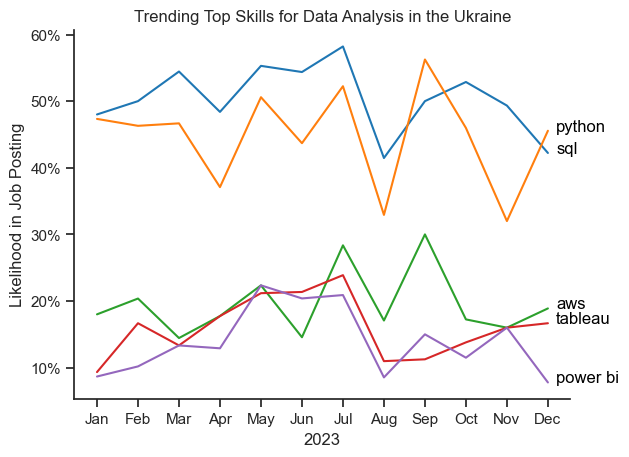

In [60]:
df_plot = df_DA_Ukr_perc.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysis in the Ukraine')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')


plt.show()